In [1]:
# Code for extraction data retrieved from snippet given by Prof. Philip Sterne
from sklearn.datasets import fetch_mldata
from shutil import copyfileobj
from six.moves import urllib
from sklearn.datasets.base import get_data_home
import os

def fetch_mnist(data_home=None):
    mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
    data_home = get_data_home(data_home=data_home)
    data_home = os.path.join(data_home, 'mldata')
    if not os.path.exists(data_home):
        os.makedirs(data_home)
    mnist_save_path = os.path.join(data_home, "mnist-original.mat")
    if not os.path.exists(mnist_save_path):
        mnist_url = urllib.request.urlopen(mnist_alternative_url)
        with open(mnist_save_path, "wb") as matlab_file:
            copyfileobj(mnist_url, matlab_file)
fetch_mnist()
mnist = fetch_mldata("MNIST original")

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import time
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report

In [11]:
def plot_img(num_types, X, y):
    '''
        Inputs:
        num_types: Number of types of digits in the datasets
        X: Array with pixels value for each data point. Each datapoint has 28*28 pixels
        y: Array with corresponding lables for the data point
        
        Task:
        Plots two images of each num_types from the X datapoints
        Assumes that the datapoints are concanetated so if there are two digits
        all the data points of one digits come after another digits' data points
        
        Output:
        Plots the graph of images of different datapoints
    '''
    
    # Picking the indexes for choosing the data points for ploting
    idx_arr = np.linspace(0,X.shape[0] - 1, num=(num_types*2))
    idx_arr = idx_arr.astype(int)

    plt_index = 1 # index for the subplot
    for idx in idx_arr:
        img = X[idx]

        # Converting pixel value to 8-bit integer with values from 0 to 255 
        img = np.array(img, dtype='uint8')

        # Reshaping the array into 28*28 pixel array for image representation
        img = img.reshape((28,28))

        # Ploting the image with subplots so each digits has two image
        plt.subplot(num_types,2,plt_index)
        plt.title('Image of Label {0}'.format(y[idx]))
        plt.imshow(img)
        plt_index += 1

    plt.show()
    

def train_and_report_svc(params, X_train, y_train, X_test, y_test):
    '''
        Task:
        - Trains a SVC classifier using given parameters and passed datapoints.
        - Calculates the time taken to train the classifier
        - Calculates the cross validation score of the model with 10 folds
        - Performs prediction on test dataset and calculates accuracy score and
          classification report (precision score, recall score and f1-score)
          
        Input:
        - params: A dict with parameters for the SVC classifier
        - X_train: The dataset on which the SVC classifier would be trained on
        - y_train: The labels of training data set
        - X_test: The test dataset on which the classifier's performance would be tested
        - y_test: The labels of test dataset.
        
        Output:
        - A dict with the model, training time, scores (array with accuracy score on 
            training and test data set), cross validation score and classification report
        - Also prints these outputs
    '''
    model = SVC(**params)
    print(params)
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()
    training_time = end-start
    print('Time taken to train model::', training_time)
    
    score_train = model.score(X_train, y_train)
    score_test = model.score(X_test, y_test)
    scores = [score_train, score_test]
    
    cv_score = cross_val_score(model, X_train, y_train, cv=10)
    print('Cross Validation Score::\n', cv_score)
    
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)
    print(report)
    
    return_dict = {
        'model': model,
        'training_time': training_time,
        'scores': scores,
        'cv_score': cv_score,
        'report': report
    }
    return return_dict

(13649, 784) (13649,)


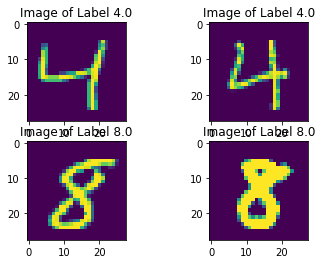

{'kernel': 'linear'}
Time taken to train model:: 4.11262321472168
Cross Validation Score::
 [0.98955068 0.98640167 0.9874477  0.98743455 0.99267016 0.98848168
 0.99162304 0.98534031 0.9895288  0.99371728]
             precision    recall  f1-score   support

        4.0       0.99      0.99      0.99      2061
        8.0       0.99      0.99      0.99      2034

avg / total       0.99      0.99      0.99      4095

{'kernel': 'poly'}
Time taken to train model:: 4.382824182510376
Cross Validation Score::
 [0.99582027 0.99476987 0.99790795 0.99895288 0.99371728 0.99895288
 0.9947644  0.99581152 0.99371728 0.99895288]
             precision    recall  f1-score   support

        4.0       1.00      1.00      1.00      2061
        8.0       1.00      1.00      1.00      2034

avg / total       1.00      1.00      1.00      4095

{'kernel': 'rbf', 'gamma': 1e-08, 'cache_size': 600}
Time taken to train model:: 11.931614875793457
Cross Validation Score::
 [0.99164054 0.98953975 0.98535565 0

In [16]:
# Choosing 4 and 8 from the larger data set for creating classifiers

trainset = np.concatenate((\
                           mnist.data[np.where(mnist.target==4)],
                           mnist.data[np.where(mnist.target==8)]))
                       
target = np.concatenate((\
                         mnist.target[np.where(mnist.target==4)],
                         mnist.target[np.where(mnist.target==8)]))

print (trainset.shape, target.shape)


# Plotting images of digits from training dataset
plot_img(2, trainset, target)


# Spliting into training and test dataset
X_train, X_test, y_train, y_test = train_test_split(trainset, target,\
                                                    test_size=0.3, \
                                                    random_state=25)

# Training and getting reports using different kernels
params = {
    'kernel': 'linear'
}
svc_linear = train_and_report_svc(params, X_train, y_train, X_test, y_test)

params = {
    'kernel': 'poly'
}
svc_poly = train_and_report_svc(params, X_train, y_train, X_test, y_test)

params = {
    'kernel': 'rbf',
    'gamma': 1e-8,
    'cache_size': 600
}
svc_rbf = train_and_report_svc(params, X_train, y_train, X_test, y_test)

## Comment on choosing the parameters

I used the default parameters for linear and polynomial kernels. However, the default parameters for rbf kernel did not work well. I was getting an accuracy score of 0.48 on the unseen test dataset. This score means on a two classes dataset a random coin flipping classifier will work better as it should give 0.50 score or classify 50% of dataset in the correct classes. After trying to fine tune the parameters and performing a Grid Search CV, which I left in the midway as it was taking tremendous amount of time, I reached out for help and Michelle suggested me to use even smaller values for gamma, so I ended up using 1e-8 and it started performing well.

In [6]:
# Combining the training times and scores into a data frame

kernels = ['linear', 'poly', 'rbf']
training_times = []
accuracy_scores_training = []
accuracy_scores_test = []

svc_dicts = [svc_linear, svc_poly, svc_rbf]
for svc_dict in svc_dicts:
    training_times.append(svc_dict['training_time'])
    accuracy_scores_training.append(svc_dict['scores'][0])
    accuracy_scores_test.append(svc_dict['scores'][1])

results = pd.DataFrame(np.column_stack([kernels, training_times, 
                                        accuracy_scores_training,
                                       accuracy_scores_test]),
                      columns=['Kernel', 'Time_Taken', 
                               'Accuracy_scores_Training',
                              'Accuracy_scores_Test'])
results

,Kernel,Time_Taken,Accuracy_scores_Training,Accuracy_scores_Test
0,linear,3.943664789199829,1.0,0.989010989010989
1,poly,5.219098806381226,1.0,0.9973137973137973
2,rbf,12.361427783966064,0.9908938664433745,0.9907203907203908


# Report

Training svm on linear kernel takes the least amount of time. It only takes about 3.9 seconds to train a linear kernel. Training SVC with a polynomial kernal takes slightly longer time (5.2 seconds) but gives marginally better results (score on test data set for poly kernel is 0.997) than the linear kernel whose accuracy score is 0.989. SVC with poly kernel is able to classify almost all the data points in test data to their correct classes as given by a perfect 1.00 precision, recall and f1-score. There could still be some incorrect classification since the values has been scores have been rounded off. However, linear kernel is slighly behind as it correctly classifies 99% of the unseen test dataset. 

Furthermore, svm with a rbf kernel takes the longest time to train as it has to create a lot of rbf and combine them together. It takes more than 2 times the time than both linear and poly kernel. Although it takes a longer time, it has a worse performance on both training and test dataset with precision, accuracy and recall score of 0.99.

Moreove, all the kernels have very high cross validation score above 0.99 on all folds, which means the models are not overfitting on the training dataset.

As it takes reasonable less time but gives out the best model with a perfect classification in the given dataset, svc with poly kernel is best for the MNIST datasets while classifying only two digits.

# Additional training with all the digits

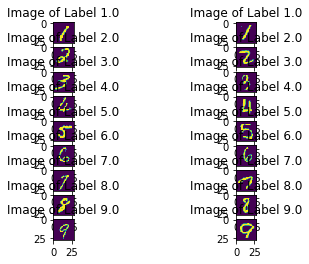

Time taken to train model:: 2.685487747192383
Cross Validation Score::
 [0.909375   0.9153605  0.89968652 0.92380952 0.88888889 0.88216561
 0.91373802 0.90384615 0.92628205 0.88102894]
             precision    recall  f1-score   support

        1.0       0.95      0.97      0.96       143
        2.0       0.89      0.86      0.88       127
        3.0       0.86      0.88      0.87       161
        4.0       0.86      0.95      0.91       147
        5.0       0.84      0.88      0.86       147
        6.0       0.95      0.95      0.95       145
        7.0       0.97      0.90      0.93       164
        8.0       0.92      0.84      0.88       167
        9.0       0.86      0.86      0.86       149

avg / total       0.90      0.90      0.90      1350

Time taken to train model:: 3.6995341777801514
Cross Validation Score::
 [0.928125   0.94357367 0.92476489 0.93968254 0.93015873 0.92993631
 0.94888179 0.93589744 0.95833333 0.90353698]
             precision    recall  f1-score 

In [9]:
# Dataset subsetted by splitting data points of each digit label to a separate array
# and choosing 500 data points from each array for training the models.
pixels = [mnist.data[np.where(mnist.target==i)] for i in range(1, 10)]
targets = [mnist.target[np.where(mnist.target==i)] for i in range(1, 10)]

trainset = np.concatenate((pixels[0][:500], 
                           pixels[1][:500], 
                           pixels[2][:500],
                          pixels[3][:500],
                          pixels[4][:500],
                          pixels[5][:500],
                          pixels[6][:500],
                          pixels[7][:500],
                          pixels[8][:500]))
target = np.concatenate((targets[0][:500], 
                           targets[1][:500], 
                           targets[2][:500],
                          targets[3][:500],
                          targets[4][:500],
                          targets[5][:500],
                          targets[6][:500],
                          targets[7][:500],
                          targets[8][:500]))

plot_img(9, trainset, target)

X_train, X_test, y_train, y_test = train_test_split(trainset, target,\
                                                    test_size=0.3, \
                                                    random_state=25)

# Training and getting reports using different kernels
params = {
    'kernel': 'linear'
}
svc_linear = train_and_report_svc(params, X_train, y_train, X_test, y_test)

params = {
    'kernel': 'poly'
}
svc_poly = train_and_report_svc(params, X_train, y_train, X_test, y_test)

params = {
    'kernel': 'rbf',
    'gamma': 1e-8,
    'cache_size': 600
}
svc_rbf = train_and_report_svc(params, X_train, y_train, X_test, y_test)

In [15]:
# Combining the training times and scores into a data frame

kernels = ['linear', 'poly', 'rbf']
training_times = []
accuracy_scores_training = []
accuracy_scores_test = []

svc_dicts = [svc_linear, svc_poly, svc_rbf]
for svc_dict in svc_dicts:
    training_times.append(svc_dict['training_time'])
    accuracy_scores_training.append(svc_dict['scores'][0])
    accuracy_scores_test.append(svc_dict['scores'][1])

results = pd.DataFrame(np.column_stack([kernels, training_times, 
                                        accuracy_scores_training,
                                       accuracy_scores_test]),
                      columns=['Kernel', 'Time_Taken', 
                               'Accuracy_scores_Training',
                              'Accuracy_scores_Test'])
results

,Kernel,Time_Taken,Accuracy_scores_Training,Accuracy_scores_Test
0,linear,2.685487747192383,1.0,0.8977777777777778
1,poly,3.6995341777801514,1.0,0.9407407407407408
2,rbf,9.664051055908203,0.8974603174603175,0.8844444444444445


# Report on creating classifier to classify all the digits

It took a tremendous computational power to train the complete MNIST dataset. In lack of enough compuational power, I decreased the size of dataset to have 500 samples of each digit image. I created 9 data arrays that stored datapoints of each digit and 9 target arrays that stored respective target or digit value of each digit. Then I sliced 500 datapoints from each array and combined the subsets to a training and test datasets. Then, I used train and test split function to divide this new abriged datasets to train and test the models. 

Even with this small dataset, all the models performed well. SVC with rbf kernel took the longest time to train with 9.66 seconds, but performed the worst with average f1-score of 0.88 and mean accuracy score of 0.88. The best performer was SVC with poly kernel which had a precision score of 0.94 and recall score of 0.94. Even with this small dataset, it was able to classify 94% of the unseen data correctly to their correct classes. The linear kernel SVC took the least amount of time to learn, but performed fairly well with f1-score of 0.90 and mean accuracy score of 0.897 as it could classify at least 90% of data in the correct classes.

In [14]:
# Testing the dataset in totally onseen data points to check the feasibility
test_set = np.concatenate((pixels[0][1000:2000], 
                           pixels[1][1000:2000], 
                           pixels[2][1000:2000],
                          pixels[3][1000:2000],
                          pixels[4][1000:2000],
                          pixels[5][1000:2000], 
                           pixels[6][1000:2000], 
                           pixels[7][1000:2000],
                          pixels[8][1000:2000]))

test_target = np.concatenate((targets[0][1000:2000], 
                           targets[1][1000:2000], 
                           targets[2][1000:2000],
                          targets[3][1000:2000],
                          targets[4][1000:2000],
                            targets[5][1000:2000], 
                           targets[6][1000:2000], 
                           targets[7][1000:2000],
                          targets[8][1000:2000]))


test_pred = svc_linear['model'].predict(test_set)
print('Accuracy Score of Linear Kernel: ', svc_linear['model'].score(test_set, test_target))
print('Classification Report for Linear Kernel')
print(classification_report(test_target, test_pred))

test_pred = svc_poly['model'].predict(test_set)
print('Accuracy Score of Poly Kernel: ', svc_poly['model'].score(test_set, test_target))
print('Classification Report for Poly Kernel')
print(classification_report(test_target, test_pred))

test_pred = svc_rbf['model'].predict(test_set)
print('Accuracy Score of RBF Kernel: ', svc_rbf['model'].score(test_set, test_target))
print('Classification Report for RBF Kernel')
print(classification_report(test_target, test_pred))

Accuracy Score of Linear Kernel:  0.8905555555555555
Classification Report for Linear Kernel
             precision    recall  f1-score   support

        1.0       0.92      0.97      0.95      1000
        2.0       0.85      0.88      0.87      1000
        3.0       0.85      0.86      0.86      1000
        4.0       0.86      0.92      0.89      1000
        5.0       0.87      0.86      0.87      1000
        6.0       0.94      0.94      0.94      1000
        7.0       0.93      0.89      0.91      1000
        8.0       0.91      0.83      0.87      1000
        9.0       0.87      0.85      0.86      1000

avg / total       0.89      0.89      0.89      9000

Accuracy Score of Linear Kernel:  0.9283333333333333
Classification Report for Poly Kernel
             precision    recall  f1-score   support

        1.0       0.90      0.97      0.93      1000
        2.0       0.94      0.92      0.93      1000
        3.0       0.93      0.90      0.91      1000
        4.0      

# Testing the 9 digit classifier on unseen data-points

I performed testing with completely unseen dataset with indexes(1000 to 2000) that were not even in the first 500 datapoints for each digits. All the SVC models perform well for predicting these unseen datapoints. The poly kernel is the best performer with f1-score of 0.93 and mean accuracy score of 0.93. Then, the linear kernel is second with 0.89 f1 and accuracy score and the worst performer is RBF kernel  with a score of 0.87 which means it only classified 87% of data correctly.

All the kernels seem to misclassify other digits as digit 8. As all of the kernels have the lowest recall score for digit 8. For instance, rbf kernel has a recall score of 0.77, which means only 77% of digits classified as digit 8 were actually the data points for digit 8.

As SVM only takes the extreme values to find the support vectors, it takes less time to find the support vectors in a smaller dataset. As it neglects the rest of the data except the support vectors during classification and training, it can still perform well in unseen datasets even with such less data but so many classes.

# Failed Grid Search CV for Rbf kernel

I used the following code for perfom the Grid Search CV for rbf kernel to find the best parameter, but since I was performing it on the full dataset for the two different types of digits, it took tremendously long amount of time. So, I stopped it midway.

In [ ]:
trainset = np.concatenate((\
                           mnist.data[np.where(mnist.target==4)],
                           mnist.data[np.where(mnist.target==8)]))
                       
target = np.concatenate((\
                         mnist.target[np.where(mnist.target==4)],
                         mnist.target[np.where(mnist.target==8)]))

# Spliting into training and test dataset
X_train, X_test, y_train, y_test = train_test_split(trainset, target,\
                                                    test_size=0.3, \
                                                    random_state=25)

gamma_range = np.logspace(-10, 0, 10)
C_range = np.logspace(-1, 1, 4)

parameters = {'kernel':['rbf'], 'C':C_range, 'gamma': gamma_range}

svc_rbf = SVC()
grid_svm = GridSearchCV(estimator=svc_rbf,param_grid=parameters,n_jobs=1, verbose=2)


start_time = time.time()

grid_svm.fit(X_train, y_train)

time_taken= time.time() - start_time
print('Time Taken: ', time_taken)

sorted(grid_svm.cv_results_.keys())

classifier = grid_svm.best_estimator_
params = grid_svm.best_params_



scores = grid_svm.cv_results_['mean_test_score'].reshape(len(C_range),
                                                     len(gamma_range))

plot_param_space_scores(scores, C_range, gamma_range)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV] C=0.1, gamma=1e-10, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=1e-10, kernel=rbf, total=  57.6s
[CV] C=0.1, gamma=1e-10, kernel=rbf ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.6min remaining:    0.0s


[CV] ................... C=0.1, gamma=1e-10, kernel=rbf, total=  58.2s
[CV] C=0.1, gamma=1e-10, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=1e-10, kernel=rbf, total=  58.3s
[CV] C=0.1, gamma=1.2915496650148826e-09, kernel=rbf .................
[CV] .. C=0.1, gamma=1.2915496650148826e-09, kernel=rbf, total= 1.0min
[CV] C=0.1, gamma=1.2915496650148826e-09, kernel=rbf .................
[CV] .. C=0.1, gamma=1.2915496650148826e-09, kernel=rbf, total=  58.7s
[CV] C=0.1, gamma=1.2915496650148826e-09, kernel=rbf .................
[CV] .. C=0.1, gamma=1.2915496650148826e-09, kernel=rbf, total=  57.7s
[CV] C=0.1, gamma=1.6681005372000592e-08, kernel=rbf .................
[CV] .. C=0.1, gamma=1.6681005372000592e-08, kernel=rbf, total=  21.3s
[CV] C=0.1, gamma=1.6681005372000592e-08, kernel=rbf .................
[CV] .. C=0.1, gamma=1.6681005372000592e-08, kernel=rbf, total=  21.1s
[CV] C=0.1, gamma=1.6681005372000592e-08, kernel=rbf .................
[CV] .